#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/1_content_img/pca_512_1.csv')
data

,id,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_504,PC_505,PC_506,PC_507,PC_508,PC_509,PC_510,PC_511,PC_512,success_x
0,NMN2,0.213376,0.013544,0.032987,0.185180,0.003955,-0.077026,-0.049708,0.035528,0.091293,...,-0.000248,0.003425,-0.020116,0.008368,0.004304,-0.004723,0.005508,-0.004291,-0.000669,1
1,ZENLET-The-Dual,-0.288176,-0.044780,-0.013296,0.017734,0.050149,-0.049997,0.035743,-0.026241,0.009174,...,0.000188,-0.000331,-0.000408,0.000233,-0.000296,-0.000188,0.000218,-0.000280,-0.000004,1
2,hhl-penzhai,0.185300,-0.025601,-0.068264,-0.062307,-0.003994,-0.049939,0.008713,-0.016291,0.024617,...,-0.008558,-0.017753,-0.001222,-0.000509,0.002071,-0.013080,0.003031,-0.024782,-0.022296,1
3,scion-36,0.171731,-0.047961,-0.039545,-0.040649,0.027211,-0.046451,0.031708,0.003759,-0.000346,...,0.010168,0.010517,-0.002354,0.007672,0.003591,0.000150,0.010596,-0.006767,0.006979,1
4,amt-cube,0.353176,-0.011098,-0.031067,0.028245,-0.012658,-0.051061,-0.062722,-0.005811,0.028615,...,-0.000905,-0.025177,0.019595,0.007118,-0.009654,0.024832,0.014884,0.025601,0.013699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,wlm-tw,-0.252909,0.048431,-0.054693,-0.006045,-0.064757,0.055220,-0.008374,-0.038823,-0.044697,...,0.004465,0.008626,0.005216,0.020923,-0.037823,-0.005200,-0.025019,-0.001257,0.013245,0
5608,8bowchou,-0.288176,-0.044780,-0.013296,0.017734,0.050149,-0.049997,0.035743,-0.026241,0.009174,...,0.000188,-0.000331,-0.000408,0.000233,-0.000296,-0.000188,0.000218,-0.000280,-0.000004,0
5609,bananalin,-0.288176,-0.044780,-0.013296,0.017734,0.050149,-0.049997,0.035743,-0.026241,0.009174,...,0.000188,-0.000331,-0.000408,0.000233,-0.000296,-0.000188,0.000218,-0.000280,-0.000004,0
5610,fooddesignlab,-0.288176,-0.044780,-0.013296,0.017734,0.050149,-0.049997,0.035743,-0.026241,0.009174,...,0.000188,-0.000331,-0.000408,0.000233,-0.000296,-0.000188,0.000218,-0.000280,-0.000004,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4286
0    1326
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.6
Recall: 0.58
Precision: 0.84
F1-Score: 0.69
F0.5-Score: 0.77
F0.3-Score: 0.81


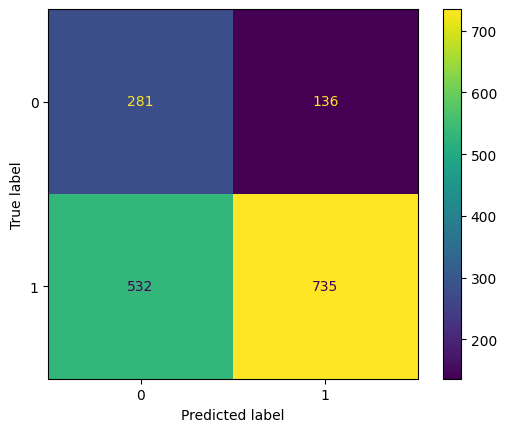

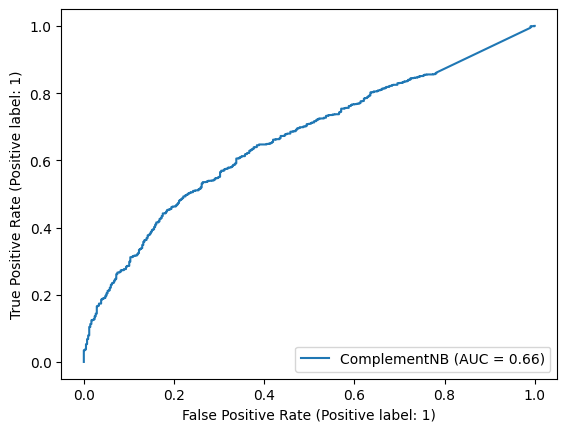

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 1.0
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


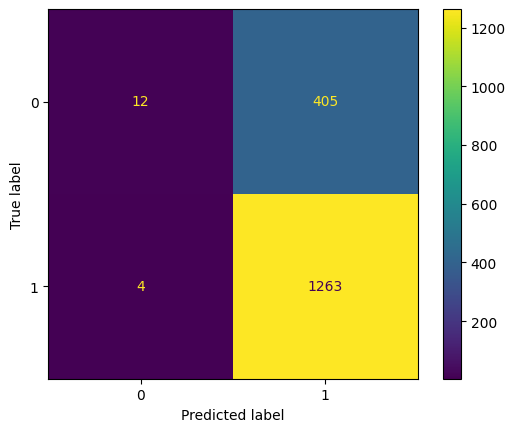

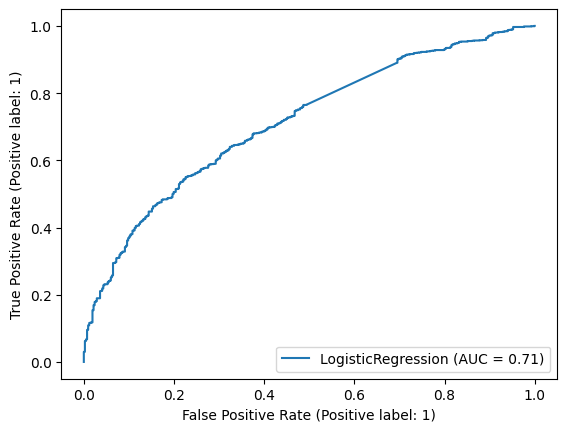

---- Under Sample Data ----
Accuracy: 0.6
Recall: 0.56
Precision: 0.86
F1-Score: 0.68
F0.5-Score: 0.78
F0.3-Score: 0.82


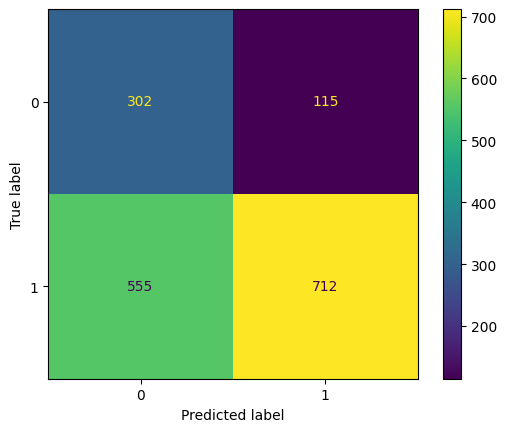

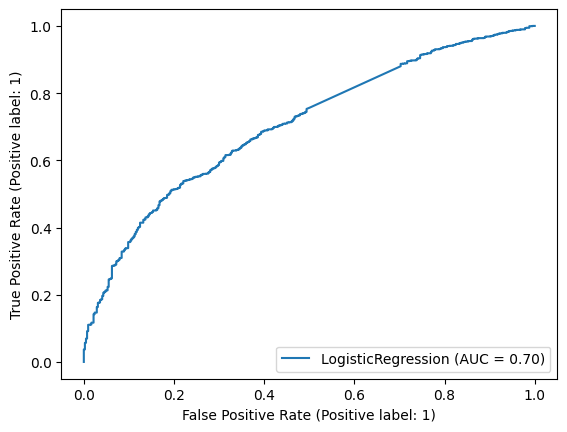

---- Over Sample Data ----
Accuracy: 0.65
Recall: 0.63
Precision: 0.86
F1-Score: 0.73
F0.5-Score: 0.8
F0.3-Score: 0.83


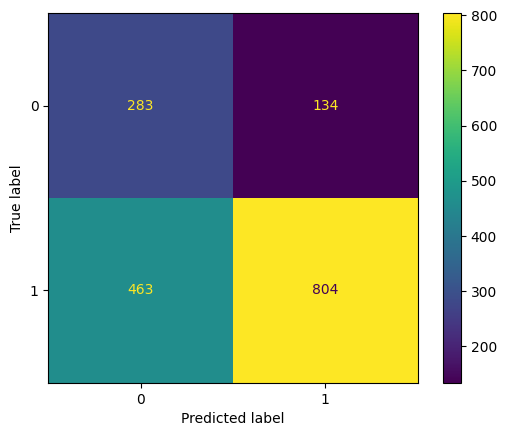

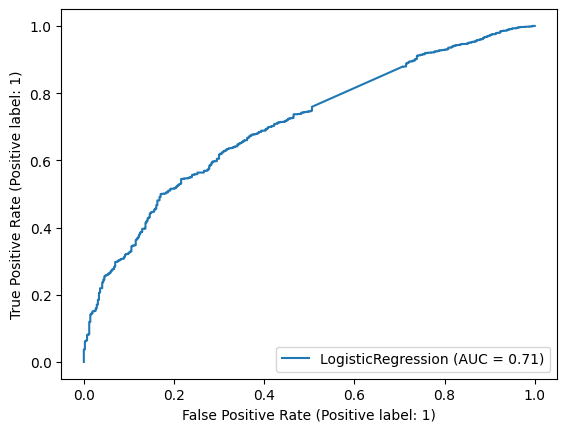

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


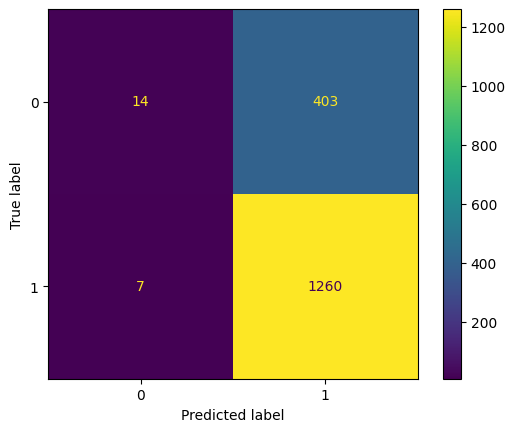

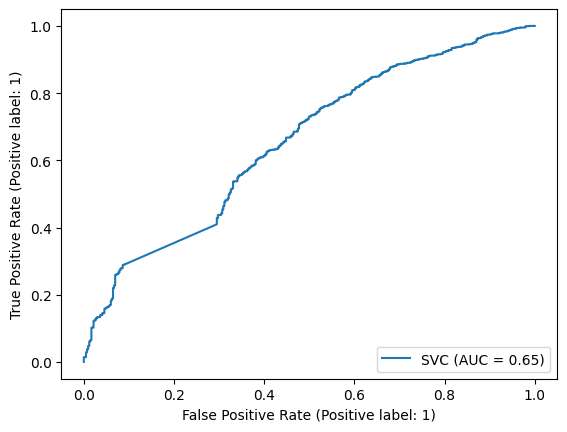

---- Under Sample Data ----
Accuracy: 0.6
Recall: 0.56
Precision: 0.86
F1-Score: 0.68
F0.5-Score: 0.78
F0.3-Score: 0.82


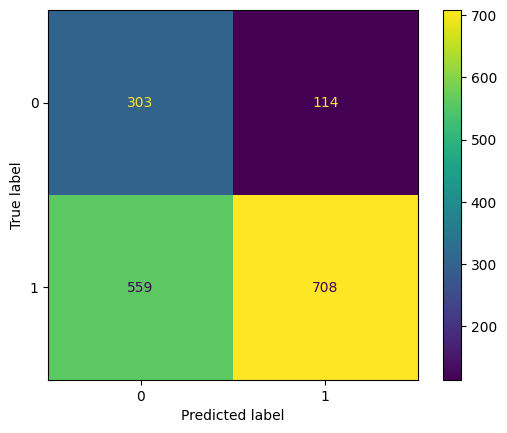

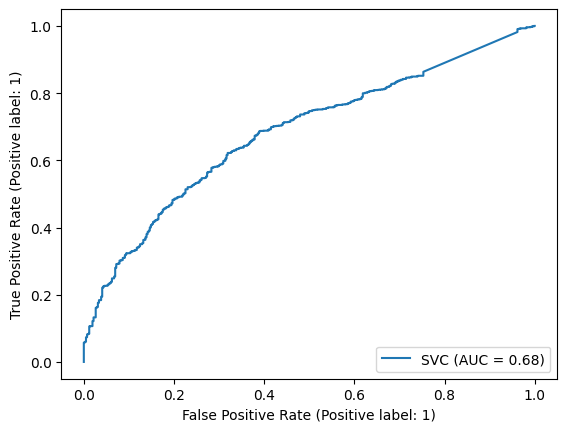

---- Over Sample Data ----
Accuracy: 0.68
Recall: 0.74
Precision: 0.81
F1-Score: 0.78
F0.5-Score: 0.8
F0.3-Score: 0.81


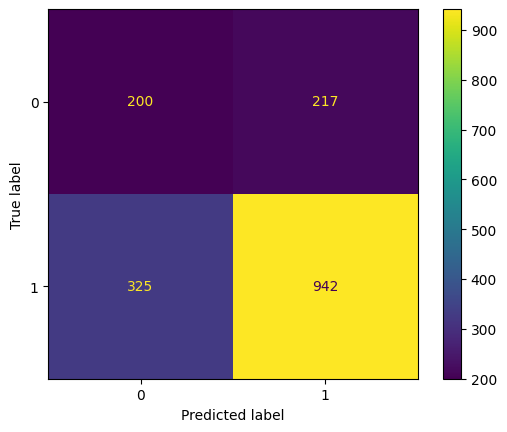

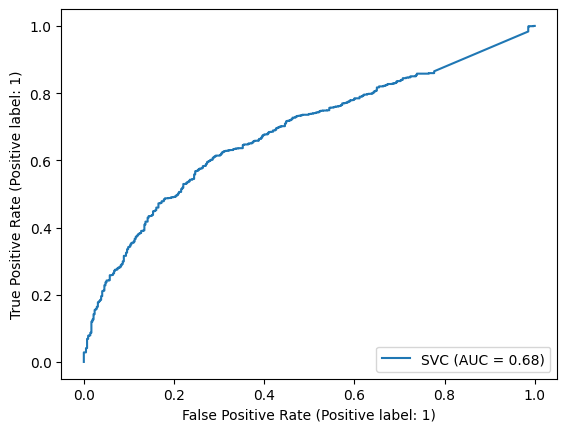

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.75
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


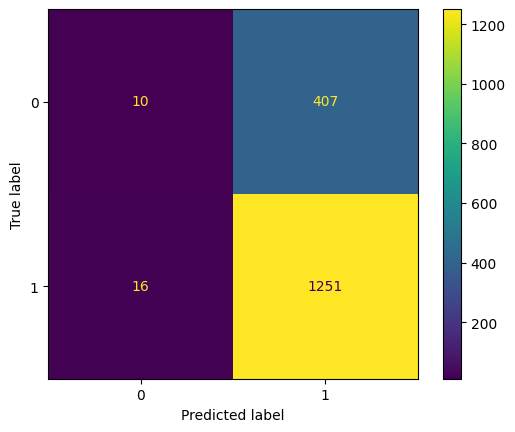

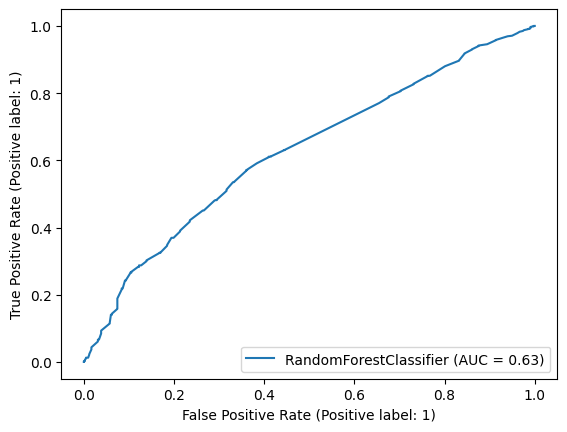

---- Under Sample Data ----
Accuracy: 0.56
Recall: 0.53
Precision: 0.82
F1-Score: 0.65
F0.5-Score: 0.74
F0.3-Score: 0.79


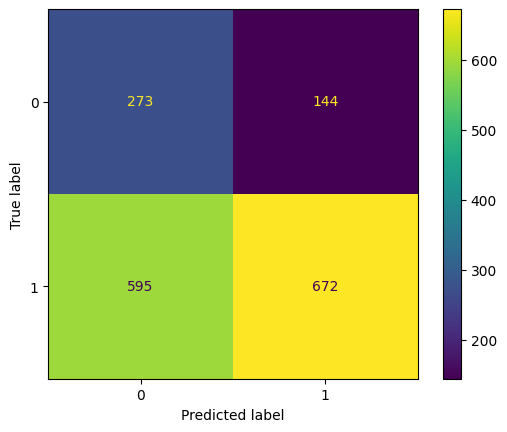

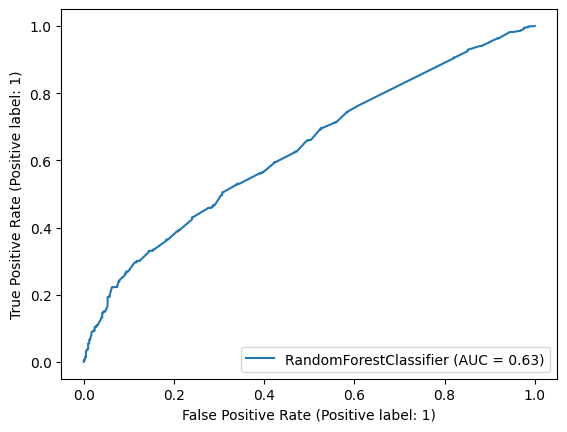

---- Over Sample Data ----
Accuracy: 0.7
Recall: 0.86
Precision: 0.77
F1-Score: 0.81
F0.5-Score: 0.79
F0.3-Score: 0.78


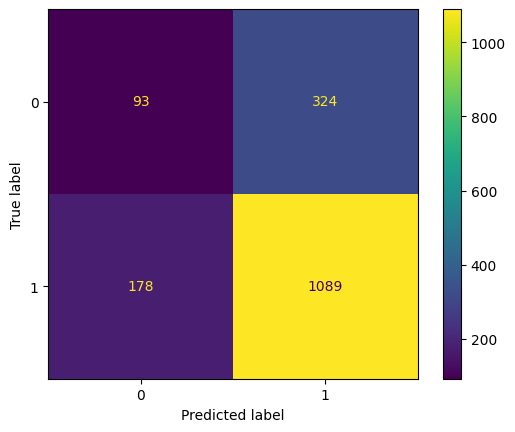

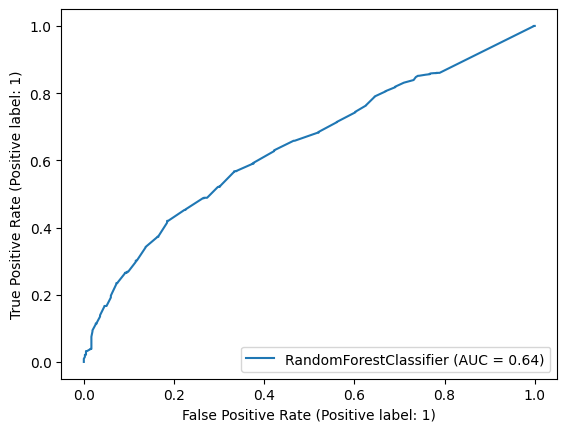

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.98
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


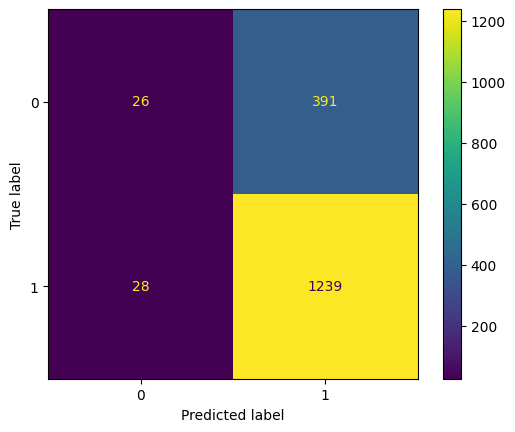

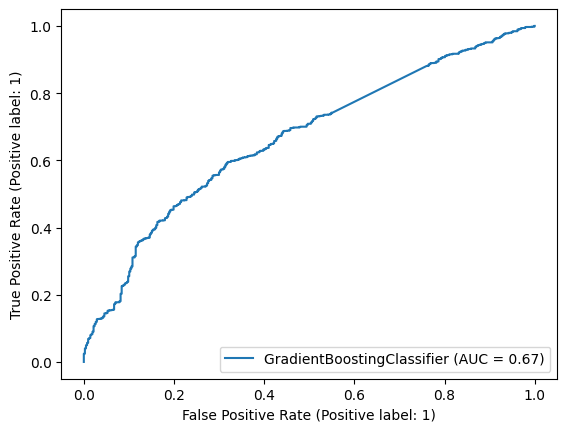

---- Under Sample Data ----
Accuracy: 0.6
Recall: 0.58
Precision: 0.85
F1-Score: 0.69
F0.5-Score: 0.78
F0.3-Score: 0.82


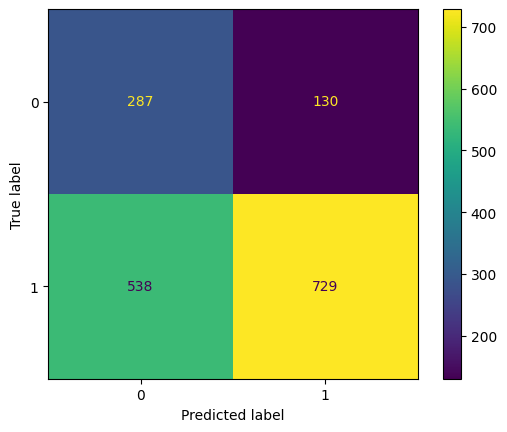

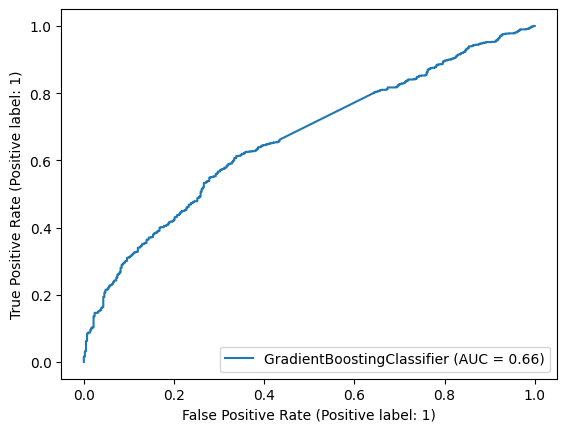

---- Over Sample Data ----
Accuracy: 0.67
Recall: 0.72
Precision: 0.81
F1-Score: 0.77
F0.5-Score: 0.79
F0.3-Score: 0.81


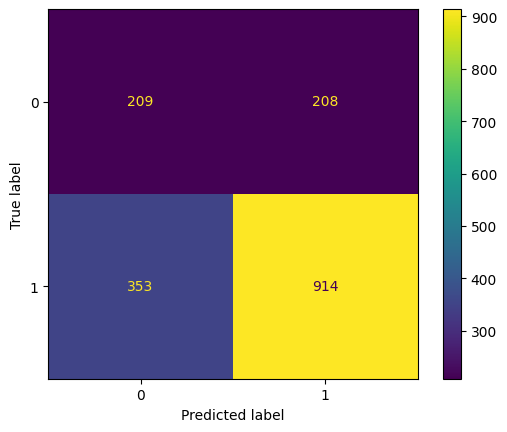

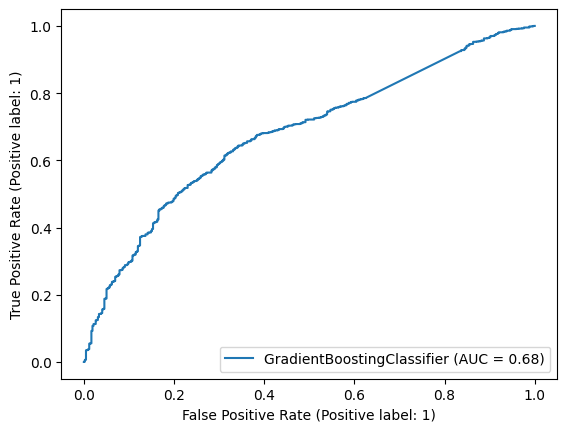

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
